In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('pokemon.csv')
df.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


## Bar chart (for CATEGORICAL variables)

### 1. Absolute frequency

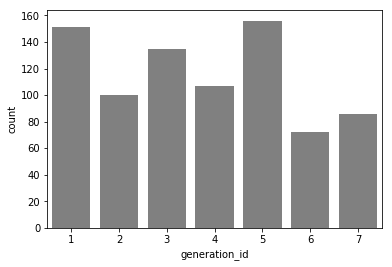

In [3]:
sns.countplot(data = df, x = 'generation_id', color = 'grey');

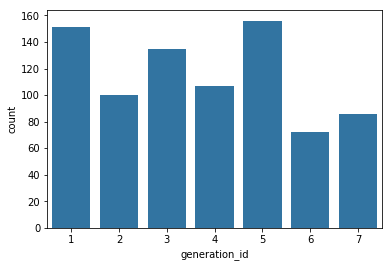

In [4]:
base_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'generation_id', color = base_color);

Order by frequency

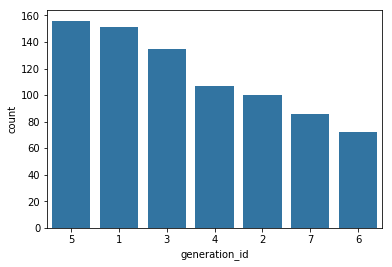

In [5]:
cat_order = df['generation_id'].value_counts().index
sns.countplot(data = df, x = 'generation_id', color = base_color, order = cat_order);

Axis rotation

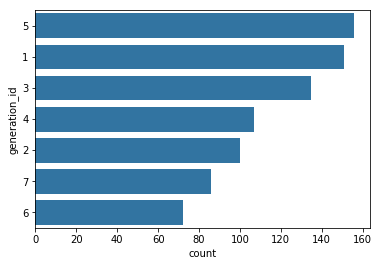

In [6]:
sns.countplot(data = df, y = 'generation_id', color = base_color, order = cat_order);

Labels rotation

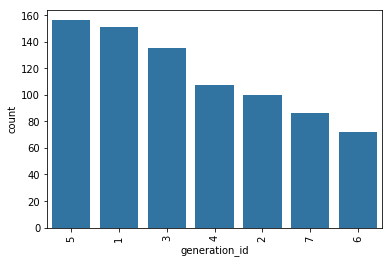

In [7]:
sns.countplot(data = df, x = 'generation_id', color = base_color, order = cat_order)
plt.xticks(rotation = 90);

### 2. Relative frequency

In [8]:
# store all types in one column in a separate df

pkmn_types = df.melt(id_vars = ['id', 'species'], 
                     value_vars = ['type_1', 'type_2'],
                    var_name = 'type_level', value_name = 'type').dropna()

In [9]:
pkmn_types.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


Making beautiful bar step-by-step

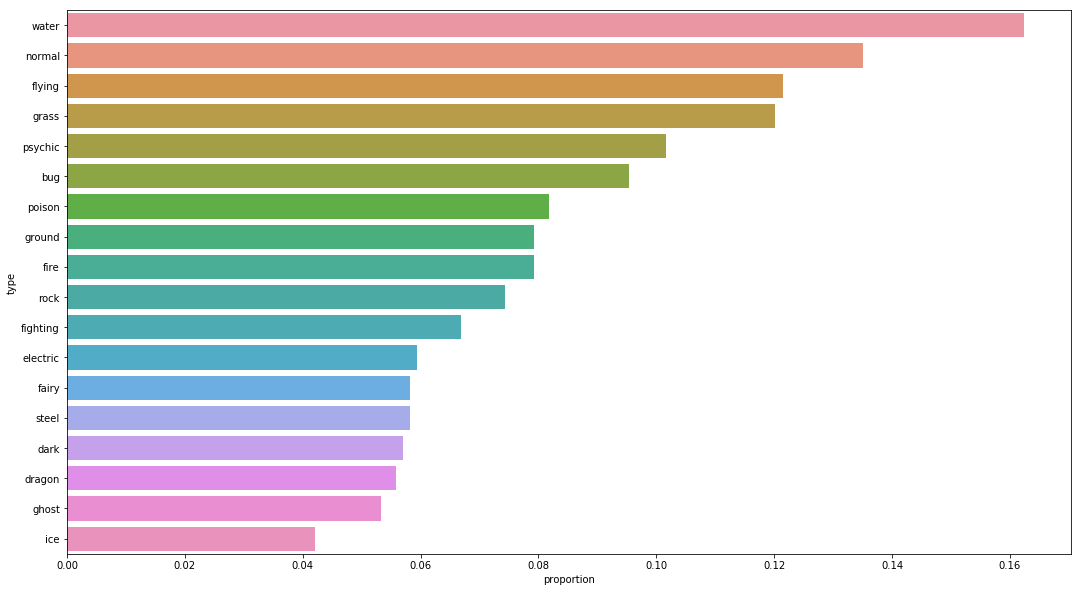

In [20]:
# 1. order values by count
orders = pkmn_types['type'].value_counts().index

# 2. get a larger figure
plt.figure(figsize=(18,10))

'''
3. This time, we want to plot Relative counts
   to do so, we first need to calculate the largest value's proportion to obtain the scale of the plot
   then, use "np.arange" function to get the x-axis range 
   then, create an array of string values of this range to use for tick labels
'''

n_pokemon = df.shape[0]
type_counts = pkmn_types['type'].value_counts()
max_type_count = type_counts[0]
max_type_prop = max_type_count / n_pokemon         
tick_props = np.arange(0, max_type_prop, 0.02) # used for ticks POSITIONS
tick_labels = ['{:0.2f}'.format(v) for v in tick_props]  # used for ticks LABELS (strings)

sns.countplot(data = pkmn_types, y = 'type', order = orders)
# first argument - tick positions, second - labels
plt.xticks(tick_props * n_pokemon, tick_labels)
plt.xlabel('proportion');

Looks good! But we can do even better plotting the actual proportion values near the bars

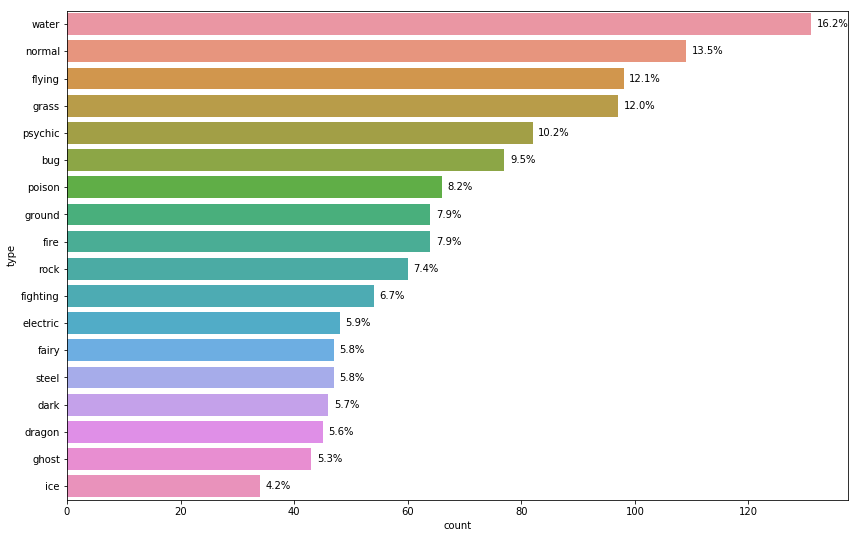

In [39]:
plt.figure(figsize=(14,9))
sns.countplot(data = pkmn_types, y = 'type', order = orders)

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    # first argument - x-position of the text (right after the bar)
    # second argument - y-position, which starts from 0 and increments with the loop
    # 3rd argument - string to be printed
    prop_text = '{:0.1f}%'.format(100 * count / n_pokemon)
    plt.text(count + 1, i, prop_text, va='center')

Counting missing data

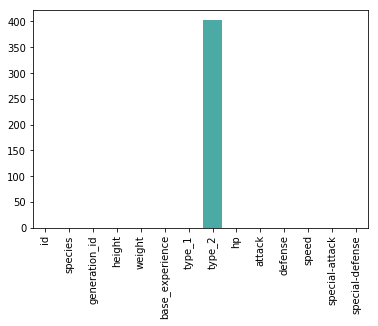

In [50]:
na_counts = df.isna().sum()
sns.barplot(na_counts.index.values, na_counts)
plt.xticks(rotation = 90);